In [1]:
%matplotlib inline

In [2]:
from pyannote.core import Segment, Timeline, Annotation
from pyannote.metrics.diarization import DiarizationErrorRate
from pyannote.metrics.errors.identification import IdentificationErrorAnalysis as IEA
from librosa import display as DS


In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd

In [4]:
def plot_segments(segments):
    """    
    segments = {'a': [(0, 5),
                    (15, 20)],
                'b': [(0, 7),
                    (19, 25)]}
    """
    #colors = {0: 'b', 1: 'r'}
    #plt.figure()
    
    for y in segments:
        for seg in segments[y]:
            plt.plot(seg, [y, y], marker = '|')
            


In [5]:
segments_x = {'a': [(0, 5),
                    (15, 20)],
                'b': [(0, 7),
                    (19, 25)]}

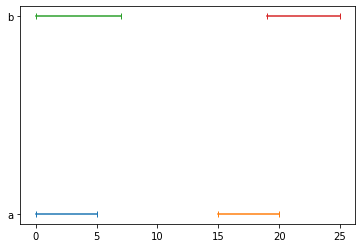

In [6]:
plot_segments(segments_x)

### generate dataframe for demonstration

In [7]:
df_data_raw = [(0,1,'seg1','spk1','gold'),(1,1.5,'seg2','spk2','gold'),(0.5,1,'seg3', 'spk3','gold'),
              (0,0.5,'seg1','spk1','model'),(1,1.5,'seg2','spk1','model'),(1.25,1,'seg3', 'spk3','model')]

In [8]:
test_df = pd.DataFrame(df_data_raw, columns=['start','stop','text','label','datatype'])
test_df

,start,stop,text,label,datatype
0,0.00,1.0,seg1,spk1,gold
1,1.00,1.5,seg2,spk2,gold
2,0.50,1.0,seg3,spk3,gold
3,0.00,0.5,seg1,spk1,model
4,1.00,1.5,seg2,spk1,model
5,1.25,1.0,seg3,spk3,model


In [9]:
test_df[test_df.datatype == 'gold'].start

0    0.0
1    1.0
2    0.5
Name: start, dtype: float64

In [10]:
def get_reference_hypothesis(data_df,gold_label, model_label):
    reference = Annotation(uri=gold_label)
    reference_df = data_df[data_df.datatype == gold_label]
    for index, row in reference_df.iterrows():
        print(row['start'], row['stop'],row['label'] )
        reference[Segment(row['start'], row['stop'])] = row['label']
    
    hypothesis = Annotation(uri=gold_label)
    hypothesis_df = data_df[data_df.datatype == model_label]
    for index, row in hypothesis_df.iterrows():
        print(row['start'], row['stop'],row['label'] )
        hypothesis[Segment(row['start'], row['stop'])] = row['label']

    
    return reference, hypothesis
        

    

In [11]:
ref, hyp = get_reference_hypothesis(test_df,gold_label = 'gold', model_label = 'model')

0.0 1.0 spk1
1.0 1.5 spk2
0.5 1.0 spk3
0.0 0.5 spk1
1.0 1.5 spk1
1.25 1.0 spk3


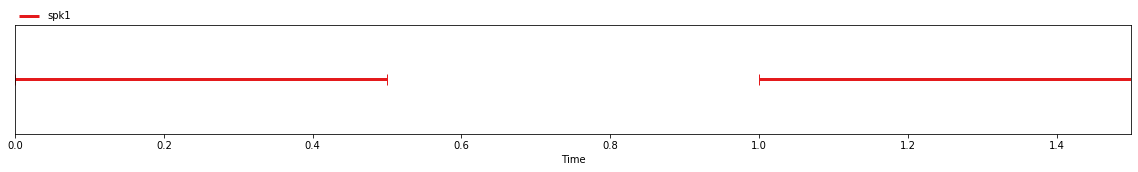

In [12]:
hyp

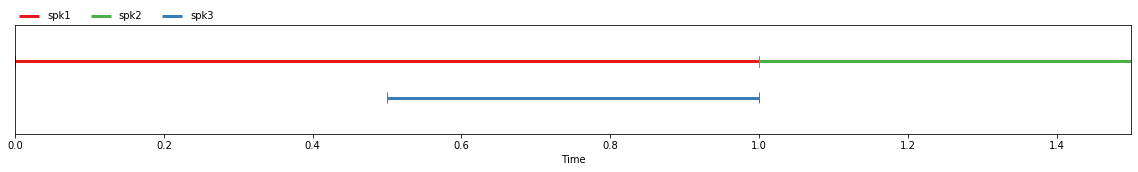

In [13]:
ref

## Diarization metrics

In [14]:
metric = DiarizationErrorRate()
met_der = metric(ref, hyp, detailed=True)


/Users/pari/University/unienv/lib/python3.6/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


In [15]:
met_der

{'confusion': 0.5,
 'total': 2.0,
 'false alarm': 0.0,
 'correct': 0.5,
 'missed detection': 1.0,
 'diarization error rate': 0.75}

## DER analysis

In [16]:
iea = IEA()
differences = iea.difference(reference=ref, hypothesis=hyp)

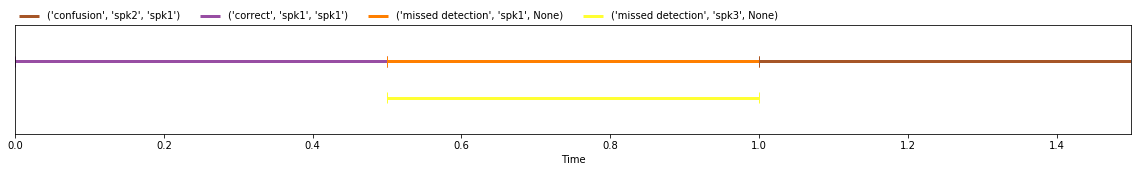

In [17]:
differences

In [18]:
import numpy as np
from scipy.io.wavfile import write
import librosa

data = np.random.uniform(-1,1,100)
write('white_noise.wav', 50, data)

## plot reference

[ 00:00:00.000 -->  00:00:01.000]
[ 00:00:00.500 -->  00:00:01.000]
[ 00:00:01.000 -->  00:00:01.500]


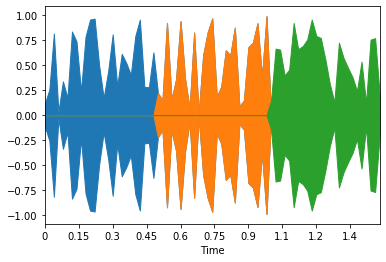

In [19]:
x = np.random.uniform(-1,1,75)
sr = 50

for item in ref.get_timeline():
    print(item)
    

    y = np.zeros(x.shape[0])
    y[int(item[0] * sr):int(item[1] * sr)] = x[int(item[0] * sr):int(item[1] * sr)]

    # print(x.shape)
    DS.waveplot(y, sr=sr)


## plot hypothesis

{'_'}
[ 00:00:00.000 -->  00:00:00.500]
(75,)
{'_'}
[ 00:00:01.000 -->  00:00:01.500]
(75,)


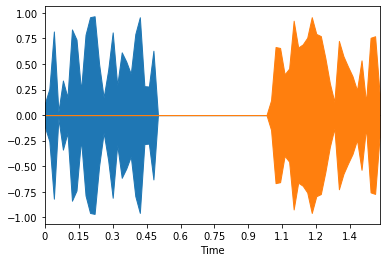

In [20]:
for item in hyp.get_timeline():
    print(hyp.get_tracks(item))
    print(item)
    

    y = np.zeros(x.shape[0])
    y[int(item[0] * sr):int(item[1] * sr)] = x[int(item[0] * sr):int(item[1] * sr)]

    # print(x.shape)
    DS.waveplot(y, sr=sr)
    print(y.shape)


## how to plot text

Text(0.5, 0.1, 'This is a text')

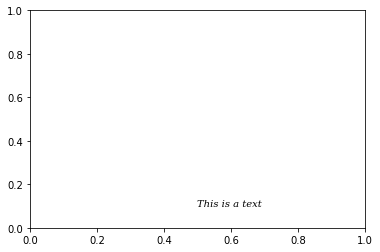

In [21]:
postion_x_axis = 0.5
postion_y_axis = 0.1
text = ("This is a text")
plt.text(postion_x_axis, postion_y_axis, text, family='serif', style='italic', ha='left', wrap=True)
